Import Necessary Packages and Classes from Other Files 

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from Channel import Channel
from beam_gen import BeamGen
from simulation import Simulation

In [3]:
# Define secret key rate functions 
def h(d, qber): 
    return -qber * np.log2(qber / (d - 1)) - (1 - qber) * np.log2(1 - qber) 

def secret_key_rate(d, qber): 
    return np.log2(d) - 2*h(d,qber)

Simulation of OAM Basis: 

In [1]:
# Constant Definitions
units = "mm"
beamWaist = 2  # Define beam waist of 2 mm
apperture = 20  # Define apperature of 2 cm
wavelength = 810E-6  # Define wavelenegth of 10 nm
observed_length = 30  # Define observed length for both the x and y directions of 2 cm
N = 500  # Number of points used for computation in both the x and y directions
num_simulations = 40

Weak Abbarations

In [4]:
# Define more specific constants

#max_ell = 5   # Define maximum used ell parameter for LG beams in OAM
propagation_distance = 10E3  # Propagation distance of 10 m
aberation_strength = "weak"  # Define aberation strength as medium
n_max = 4  # Define Zernike polynomial max n parameters

# Get aberation strength range based on strength
if aberation_strength == "weak":
    min_strength = 0.0
    max_strength = 0.2
elif aberation_strength == "medium":
    min_strength = 0.4
    max_strength = 0.6
elif aberation_strength == "strong":
    min_strength = 0.8
    max_strength = 1

# Define Zernike polynomial parameters

n = []
for i in range(n_max):
    # Repeat each n index a number of times equal to its location in the pyramid
    for j in range(i + 1):
        n.append(i)

m = []
for n_idx in range(n_max):
    for m_val in range(-n_idx, n_idx + 1, 2):
        m.append(m_val)

strengths = []  # Initialized strength list

# Generate random strengths of Zernike polynomials
np.random.seed(0)  # Define seed

for i in range(len(n)):  # Iterate over all Zerinke indices
    strength = np.random.rand() * (max_strength - min_strength) + min_strength
    strengths.append(strength)


In [5]:
sim = []  # Define simulation vector

# Iterate through sets of simulations
for sim_idx in range(num_simulations):

    # Define simulation
    sim.append(Simulation(L=observed_length, N=N,
               wavelength=wavelength, units=units))

    # Define OAM Basis
    max_ell = sim_idx
    ell_values = np.arange(-max_ell, max_ell+1)

    for l in ell_values:
        sim[sim_idx].add_beam_gen(ell=l, p=0, beam_waist=beamWaist)

    # Add initial apperture
    sim[sim_idx].add_channel(type=Channel.LENS, diam=apperture)
    sim[sim_idx].add_channel(type=Channel.ABBARATION,
                             n=n, m=m, stre=np.array(strengths), app=apperture)
    sim[sim_idx].add_channel(type=Channel.FREE_SPACE,
                             dist=propagation_distance)
    sim[sim_idx].add_channel(type=Channel.LENS, diam=apperture)

    # Run Simulation
    sim[sim_idx].run(use_mub=True)


C:\Users\itayk\AppData\Local\Temp\ipykernel_19664\1416426450.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return -qber * np.log2(qber / (d - 1)) - (1 - qber) * np.log2(1 - qber)


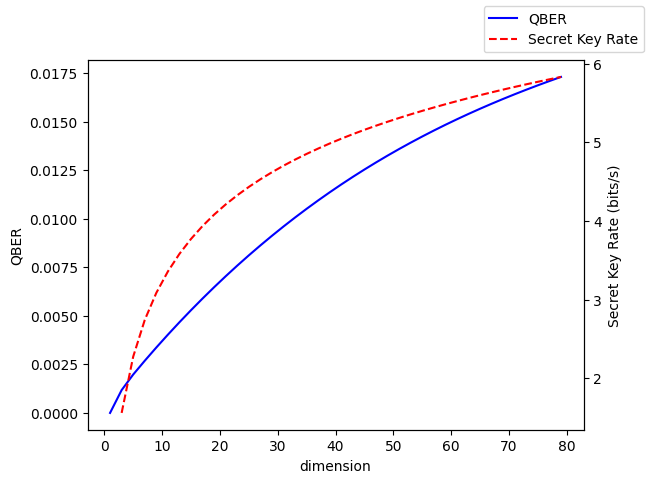

In [6]:
qber = np.zeros(num_simulations)
key_rate = np.zeros(num_simulations)
l = np.arange(0, num_simulations)

# Compute QBER Values
for i in range(num_simulations):
    qber[i] = sim[i].compute_qber(4, separate_mub=True)
    key_rate[i] = secret_key_rate(2*i + 1, qber[i])

# Get dimensions for each simulation 
dim = 2*l + 1 

fig,ax1 = plt.subplots() 
ax2 = ax1.twinx() 


ax1.plot(dim, qber, label="QBER", color='blue', )
ax2.plot(dim, key_rate, '--r', label="Secret Key Rate")
ax1.set_xlabel("dimension")
ax1.set_ylabel("QBER")
ax2.set_ylabel("Secret Key Rate (bits/s)")
fig.legend()
plt.show()

Medium Aberations

In [7]:
# Define more specific constants

#max_ell = 5   # Define maximum used ell parameter for LG beams in OAM
propagation_distance = 10E3  # Propagation distance of 10 m
aberation_strength = "medium" # Define aberation strength as medium 
n_max = 4  # Define Zernike polynomial max n parameters

# Get aberation strength range based on strength
if aberation_strength == "weak":
    min_strength = 0.0
    max_strength = 0.2
elif aberation_strength == "medium":
    min_strength = 0.4
    max_strength = 0.6
elif aberation_strength == "strong":
    min_strength = 0.8
    max_strength = 1

# Define Zernike polynomial parameters 

n = []
for i in range(n_max):
    # Repeat each n index a number of times equal to its location in the pyramid
    for j in range(i + 1):
        n.append(i)

m = []
for n_idx in range(n_max):
    for m_val in range(-n_idx, n_idx + 1, 2):
        m.append(m_val)

strengths = []  # Initialized strength list

# Generate random strengths of Zernike polynomials
np.random.seed(0)  # Define seed

for i in range(len(n)):  # Iterate over all Zerinke indices
    strength = np.random.rand() * (max_strength - min_strength) + min_strength
    strengths.append(strength)

Run a Set of OAM Simulations with Different Numbers of Basis Indices

In [8]:
sim = [] # Define simulation vector 

# Iterate through sets of simulations 
for sim_idx in range(num_simulations): 

    # Define simulation
    sim.append(Simulation(L=observed_length, N=N, wavelength=wavelength, units=units)) 

    # Define OAM Basis
    max_ell = sim_idx
    ell_values = np.arange(-max_ell, max_ell+1)

    for l in ell_values:
        sim[sim_idx].add_beam_gen(ell=l, p=0, beam_waist=beamWaist)

    # Add initial apperture
    sim[sim_idx].add_channel(type=Channel.LENS, diam=apperture)
    sim[sim_idx].add_channel(type=Channel.ABBARATION, n=n, m=m, stre=np.array(strengths), app=apperture)
    sim[sim_idx].add_channel(type=Channel.FREE_SPACE, dist=propagation_distance)
    sim[sim_idx].add_channel(type=Channel.LENS, diam=apperture)

    # Run Simulation
    sim[sim_idx].run(use_mub=True) 

Plot QBER as a Function of Max l Value

C:\Users\itayk\AppData\Local\Temp\ipykernel_19664\1416426450.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return -qber * np.log2(qber / (d - 1)) - (1 - qber) * np.log2(1 - qber)


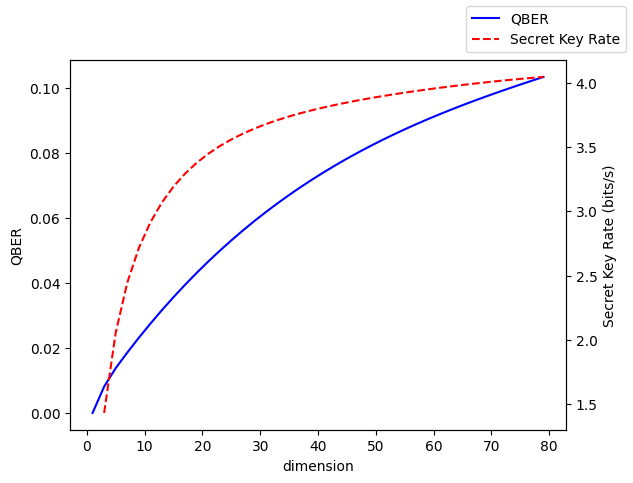

In [9]:
qber = np.zeros(num_simulations)
key_rate = np.zeros(num_simulations)
l = np.arange(0, num_simulations)

# Compute QBER Values
for i in range(num_simulations):
    qber[i] = sim[i].compute_qber(4, separate_mub=True)
    key_rate[i] = secret_key_rate(2*i + 1, qber[i])

# Get dimensions for each simulation
dim = 2*l + 1

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.plot(dim, qber, label="QBER", color='blue', )
ax2.plot(dim, key_rate, '--r', label="Secret Key Rate")
ax1.set_xlabel("dimension")
ax1.set_ylabel("QBER")
ax2.set_ylabel("Secret Key Rate (bits/s)")
fig.legend()
plt.show()


Strong Aberations: 

In [10]:
# Define more specific constants

#max_ell = 5   # Define maximum used ell parameter for LG beams in OAM
propagation_distance = 10E3  # Propagation distance of 10 m
aberation_strength = "strong"  # Define aberation strength as medium
n_max = 4  # Define Zernike polynomial max n parameters

# Get aberation strength range based on strength
if aberation_strength == "weak":
    min_strength = 0.0
    max_strength = 0.2
elif aberation_strength == "medium":
    min_strength = 0.4
    max_strength = 0.6
elif aberation_strength == "strong":
    min_strength = 0.8
    max_strength = 1

# Define Zernike polynomial parameters

n = []
for i in range(n_max):
    # Repeat each n index a number of times equal to its location in the pyramid
    for j in range(i + 1):
        n.append(i)

m = []
for n_idx in range(n_max):
    for m_val in range(-n_idx, n_idx + 1, 2):
        m.append(m_val)

strengths = []  # Initialized strength list

# Generate random strengths of Zernike polynomials
np.random.seed(0)  # Define seed

for i in range(len(n)):  # Iterate over all Zerinke indices
    strength = np.random.rand() * (max_strength - min_strength) + min_strength
    strengths.append(strength)


In [11]:
sim = []  # Define simulation vector

# Iterate through sets of simulations
for sim_idx in range(num_simulations):

    # Define simulation
    sim.append(Simulation(L=observed_length, N=N,
               wavelength=wavelength, units=units))

    # Define OAM Basis
    max_ell = sim_idx
    ell_values = np.arange(-max_ell, max_ell+1)

    for l in ell_values:
        sim[sim_idx].add_beam_gen(ell=l, p=0, beam_waist=beamWaist)

    # Add initial apperture
    sim[sim_idx].add_channel(type=Channel.LENS, diam=apperture)
    sim[sim_idx].add_channel(type=Channel.ABBARATION,
                             n=n, m=m, stre=np.array(strengths), app=apperture)
    sim[sim_idx].add_channel(type=Channel.FREE_SPACE,
                             dist=propagation_distance)
    sim[sim_idx].add_channel(type=Channel.LENS, diam=apperture)

    # Run Simulation
    sim[sim_idx].run(use_mub=True)

C:\Users\itayk\AppData\Local\Temp\ipykernel_19664\1416426450.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return -qber * np.log2(qber / (d - 1)) - (1 - qber) * np.log2(1 - qber)


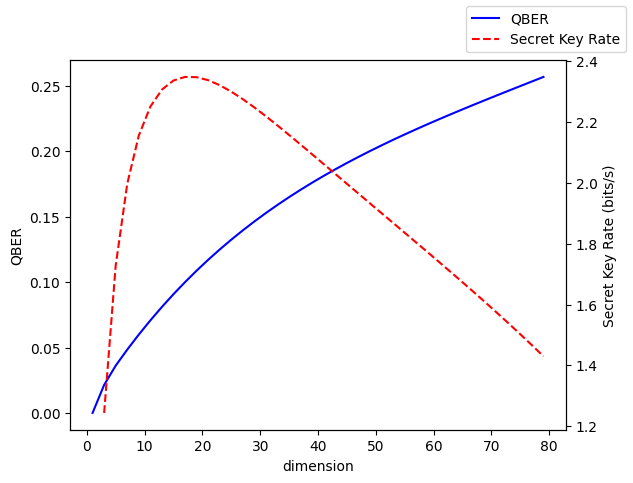

In [12]:
qber = np.zeros(num_simulations)
key_rate = np.zeros(num_simulations)
l = np.arange(0, num_simulations)

# Compute QBER Values
for i in range(num_simulations):
    qber[i] = sim[i].compute_qber(4, separate_mub=True)
    key_rate[i] = secret_key_rate(2*i + 1, qber[i])

# Get dimensions for each simulation
dim = 2*l + 1

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.plot(dim, qber, label="QBER", color='blue', )
ax2.plot(dim, key_rate, '--r', label="Secret Key Rate")
ax1.set_xlabel("dimension")
ax1.set_ylabel("QBER")
ax2.set_ylabel("Secret Key Rate (bits/s)")
fig.legend()
plt.show()

Define Individual Simulation:

In [13]:
# Define simulation
sim = Simulation(L=observed_length, N=N, wavelength=wavelength, units=units)

# Define OAM Basis
ell_values = np.arange(-max_ell, max_ell+1)

for l in ell_values:
    sim.add_beam_gen(ell=l, p=0, beam_waist=beamWaist)

# Add initial apperture
sim.add_channel(type=Channel.LENS, diam=apperture)
sim.add_channel(type=Channel.ABBARATION, n=n, m=m, stre=np.array(strengths), app=apperture)
sim.add_channel(type=Channel.FREE_SPACE, dist=propagation_distance)
sim.add_channel(type=Channel.LENS, diam=apperture)

# Run Simulation
sim.run(use_mub=True)

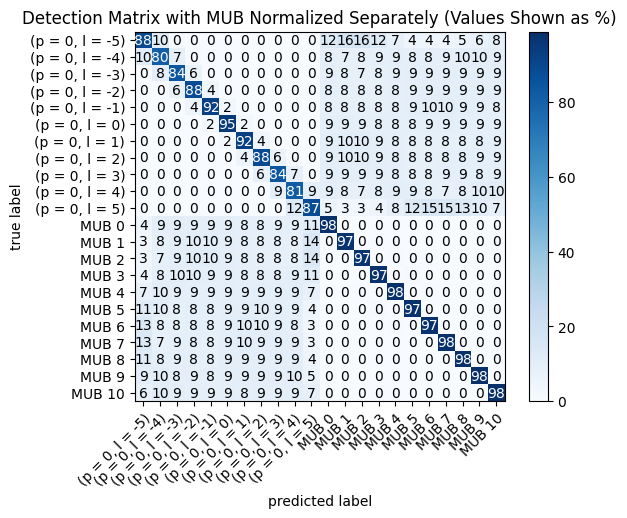

In [30]:
sim.plot_detection_matrix(separate_mub=True, channel_index=4)

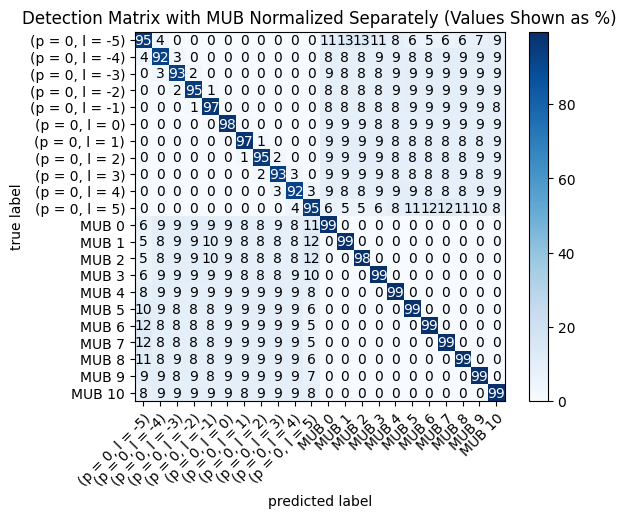

In [27]:
sim = []

# Define sets of simulations 
for i in range(10): 
    sim[i] = 

Plot Initial Beams: 

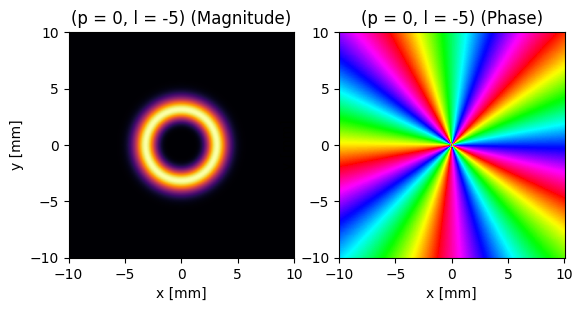

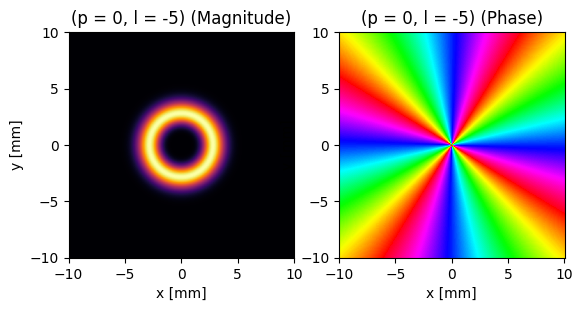

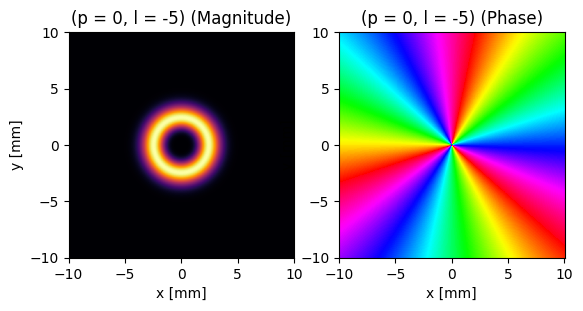

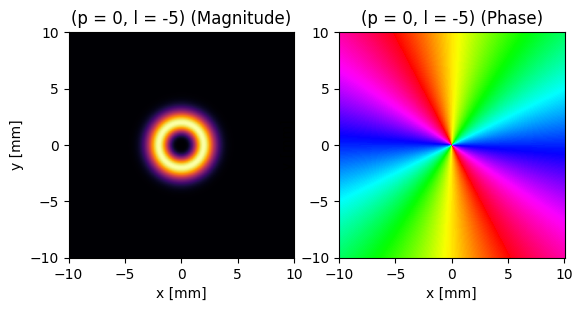

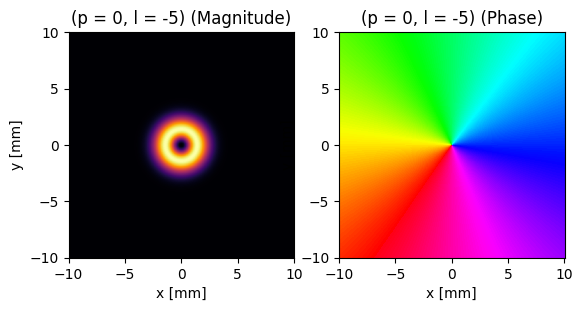

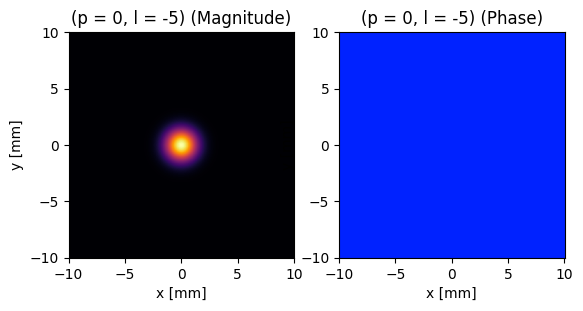

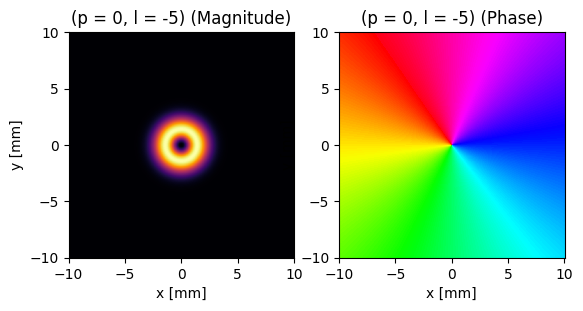

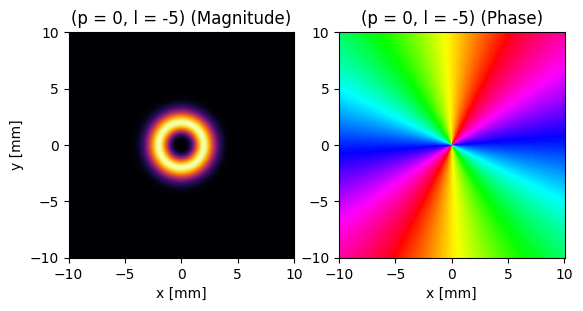

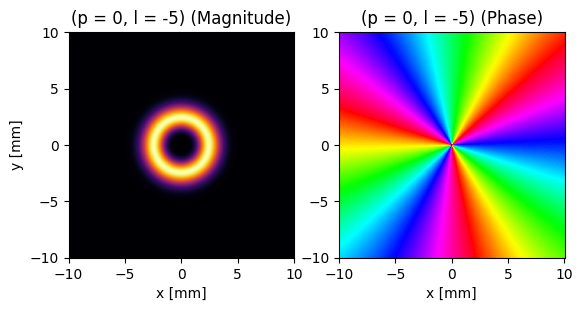

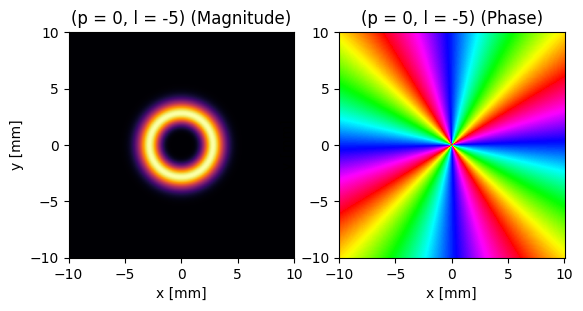

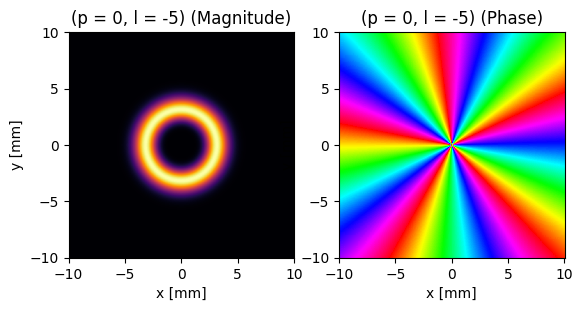

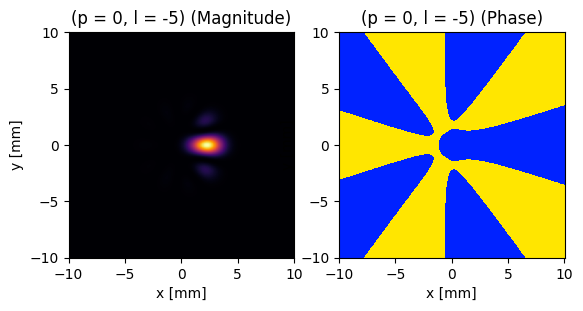

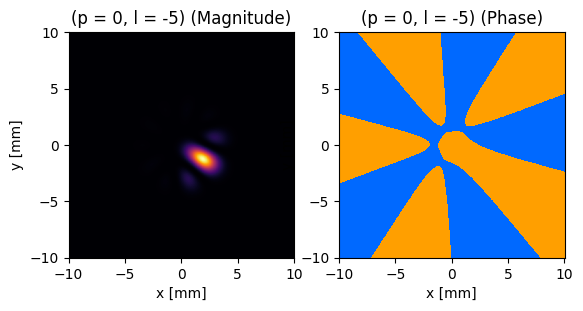

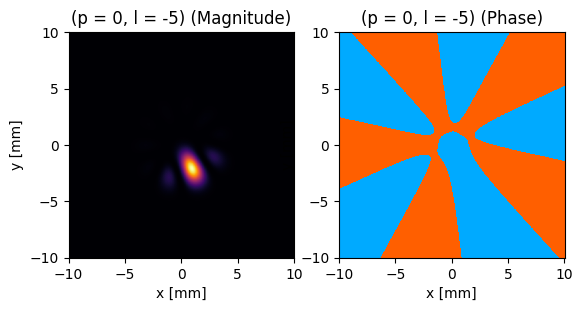

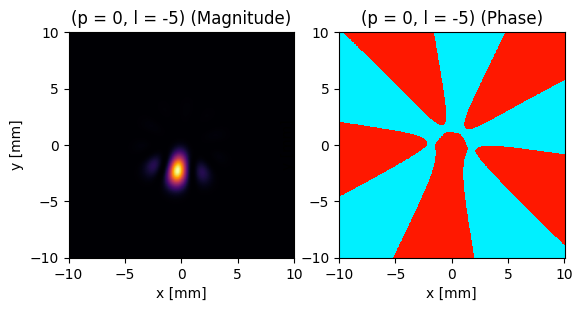

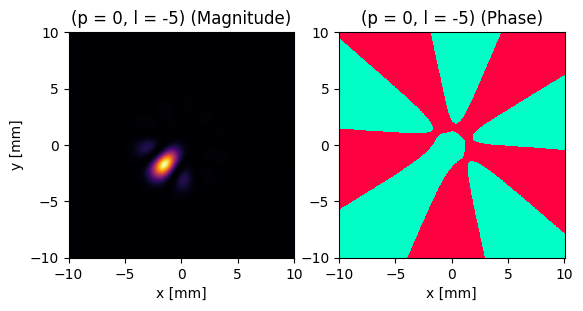

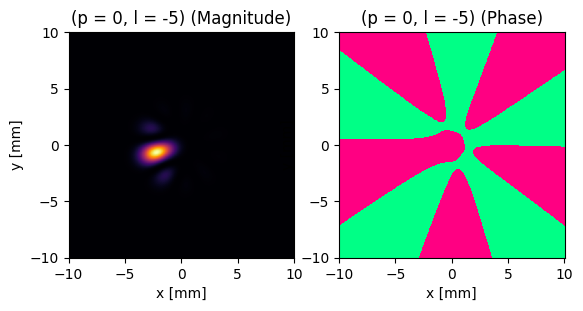

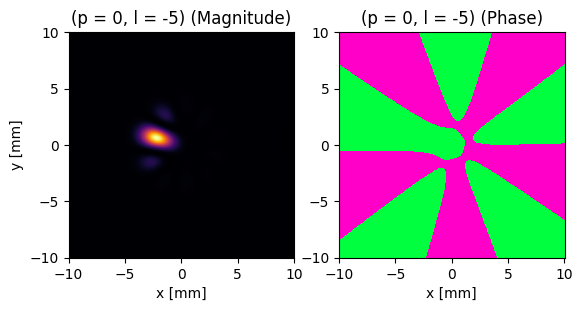

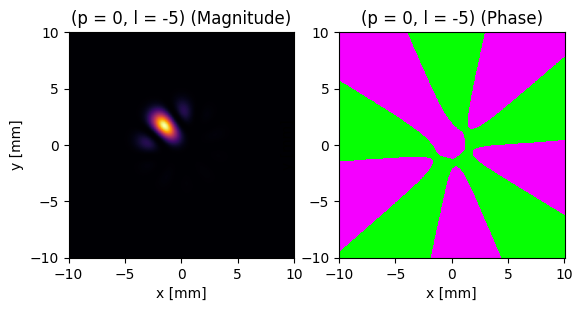

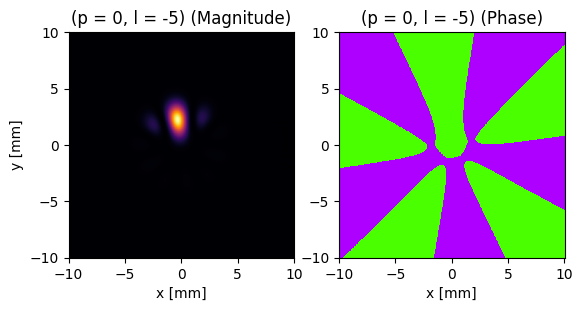

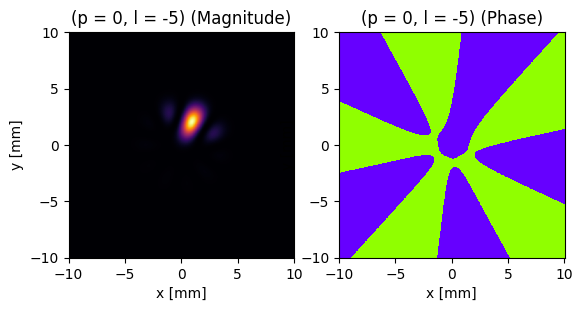

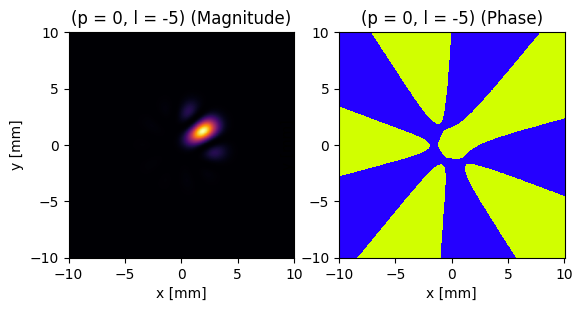

In [21]:
channel_idx = 0

for i in range(2*(2*max_ell + 1)):
    sim.plot_beams(channel_index=channel_idx, run_indices=[i])

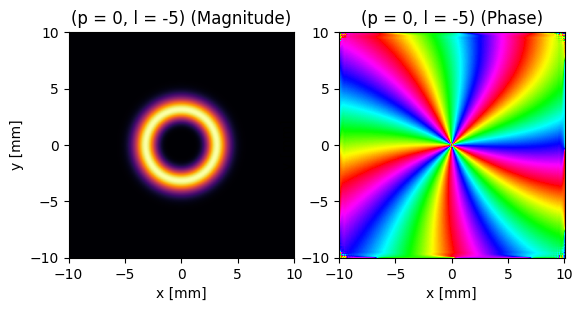

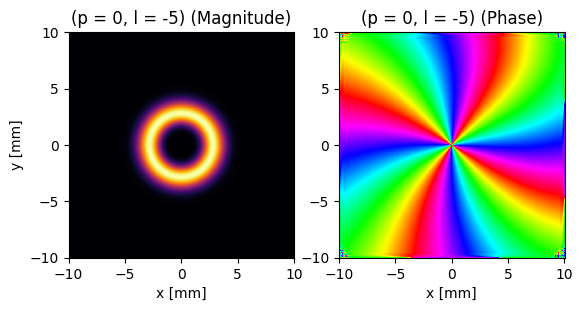

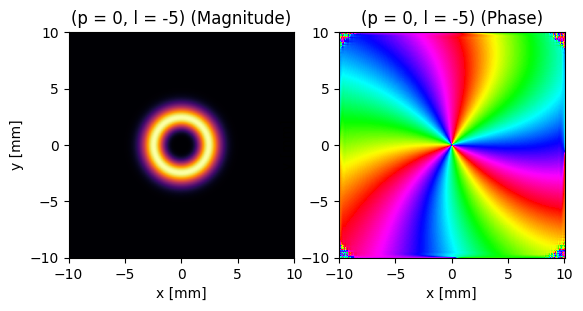

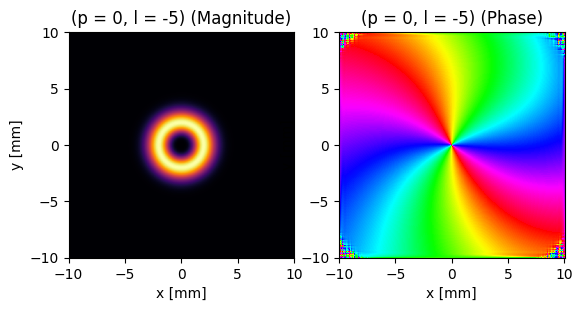

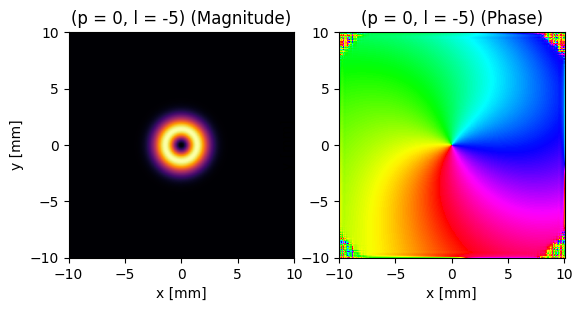

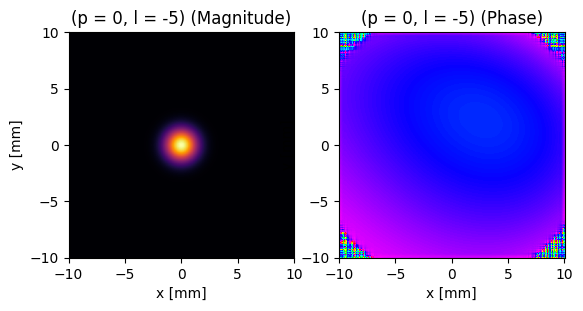

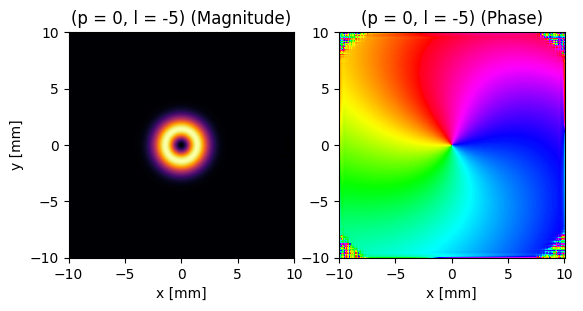

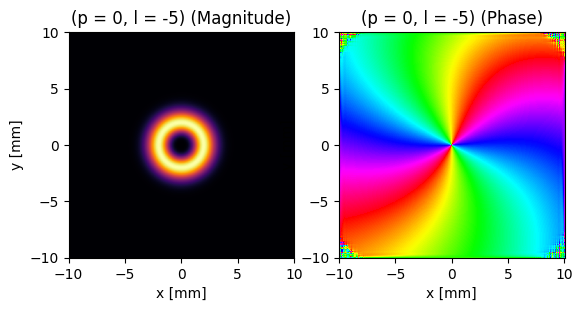

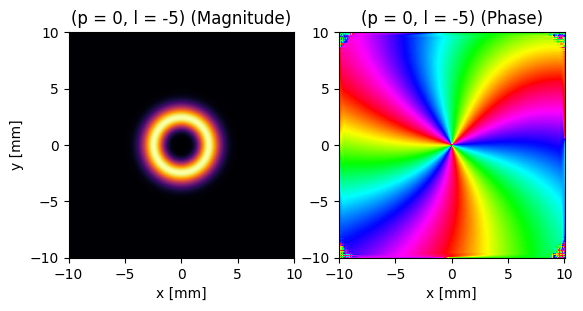

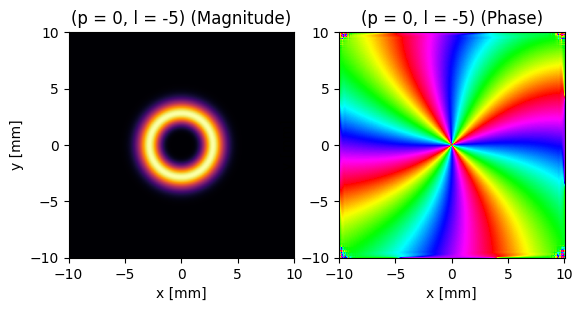

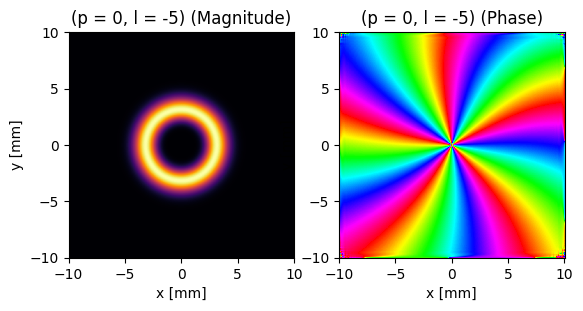

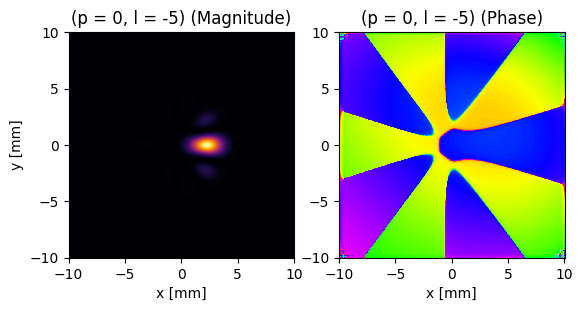

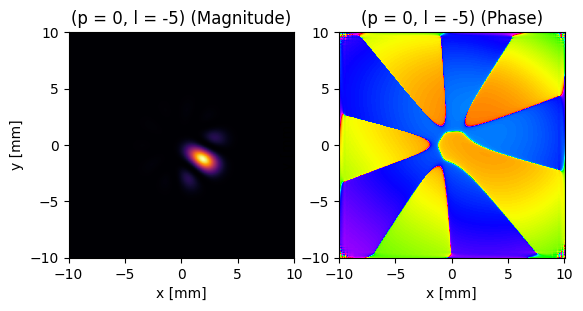

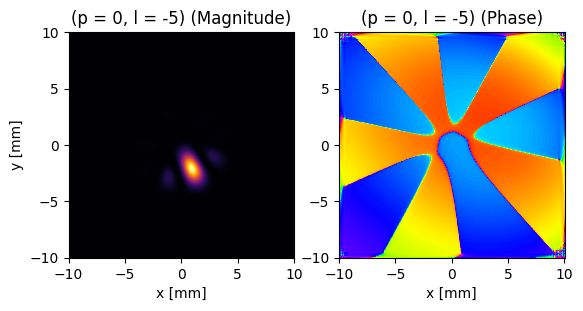

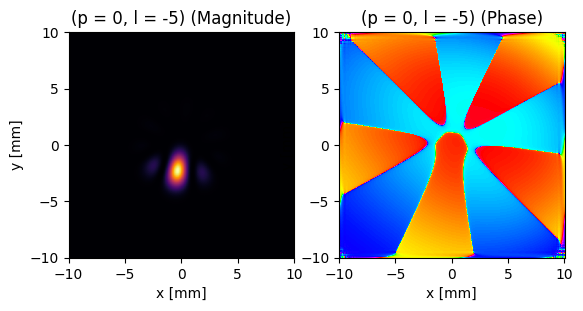

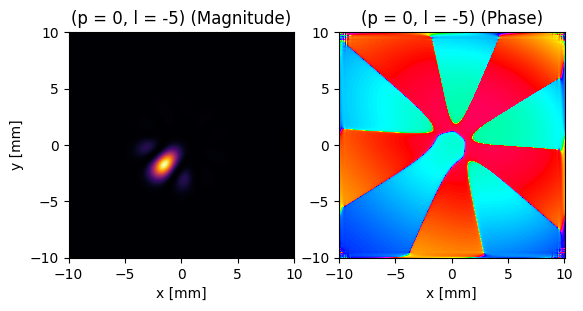

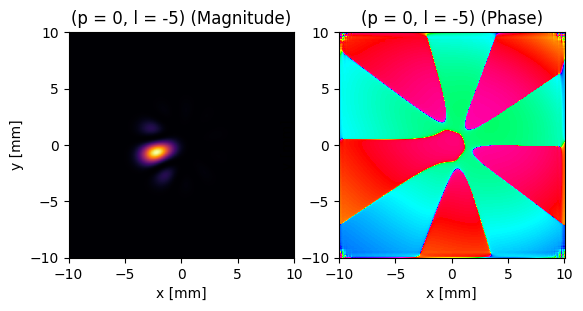

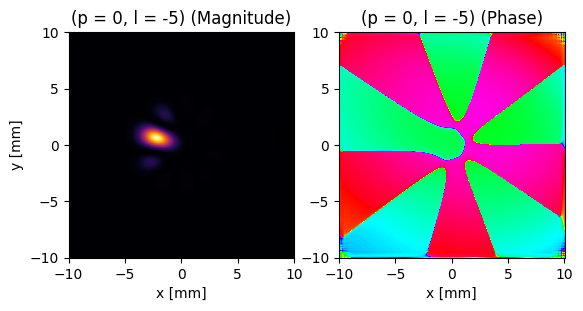

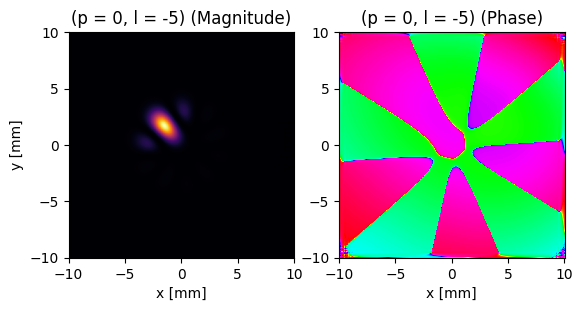

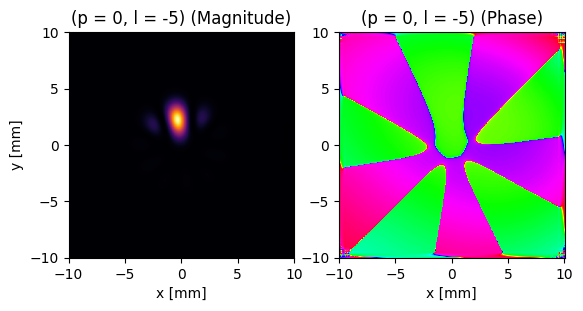

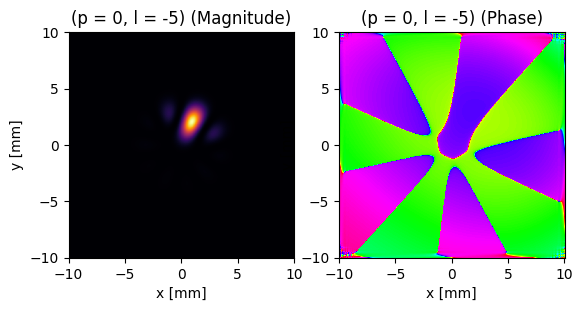

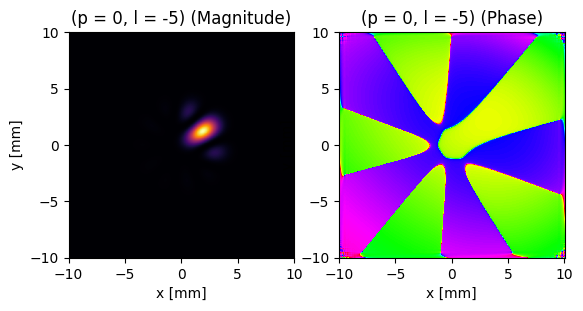

In [22]:
channel_idx = 4

for i in range(2*(2*max_ell + 1)):
    sim.plot_beams(channel_index=channel_idx, run_indices=[i])
